In [139]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

In [140]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-tra

In [141]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [142]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_12 (Flatten)        (None, 576)             

In [143]:
from keras.datasets import mnist
from keras.utils import to_categorical
# Load the images
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Prepare the image data - reshape and convert to float32
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images= test_images.reshape((10000, 28 , 28, 1))
test_images = test_images.astype("float32") / 255
# Prepare the labels - categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# Set optimizer, loss function, metrics
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 6s 4ms/step - loss: 0.1747 - accuracy: 0.9454
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0460 - accuracy: 0.9862
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0319 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0241 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0188 - accuracy: 0.9938


In [144]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0285 - accuracy: 0.9921


0.9921000003814697

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
!ls '/content/drive/MyDrive/pizza_not_pizza'

test  train  validation


In [148]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [149]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 17, 17, 128)    

In [150]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) #Rescale all images by 1/255
test_datagen = ImageDataGenerator(rescale=1./255) #Rescale all images by 1/255

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/pizza_not_pizza/train',
                                                    target_size=(150,150), #Resize all images to 150 X 150
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/pizza_not_pizza/validation',
                                                    target_size=(150,150), #Resize all images to 150 X 150
                                                    batch_size=20,
                                                    class_mode='binary')

Found 1440 images belonging to 2 classes.
Found 497 images belonging to 2 classes.


In [151]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [152]:
data_folder = '/content/drive/MyDrive/pizza_not_pizza'

In [153]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=72,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=25)


Epoch 1/30


<ipython-input-153-b0f36fe61812>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


72/72 [==============================] - 13s 167ms/step - loss: 0.6710 - acc: 0.5694 - val_loss: 0.6230 - val_acc: 0.6439
Epoch 2/30
72/72 [==============================] - 12s 170ms/step - loss: 0.5985 - acc: 0.6806 - val_loss: 0.5602 - val_acc: 0.7626
Epoch 3/30
72/72 [==============================] - 11s 147ms/step - loss: 0.5537 - acc: 0.7215 - val_loss: 0.5252 - val_acc: 0.7344
Epoch 4/30
72/72 [==============================] - 12s 165ms/step - loss: 0.5357 - acc: 0.7299 - val_loss: 0.5137 - val_acc: 0.7384
Epoch 5/30
72/72 [==============================] - 13s 181ms/step - loss: 0.5017 - acc: 0.7597 - val_loss: 0.5008 - val_acc: 0.7746
Epoch 6/30
72/72 [==============================] - 11s 149ms/step - loss: 0.4806 - acc: 0.7771 - val_loss: 0.4989 - val_acc: 0.7686
Epoch 7/30
72/72 [==============================] - 12s 161ms/step - loss: 0.4545 - acc: 0.8069 - val_loss: 0.4790 - val_acc: 0.7887
Epoch 8/30
72/72 [==============================] - 12s 166ms/step - loss: 0.445

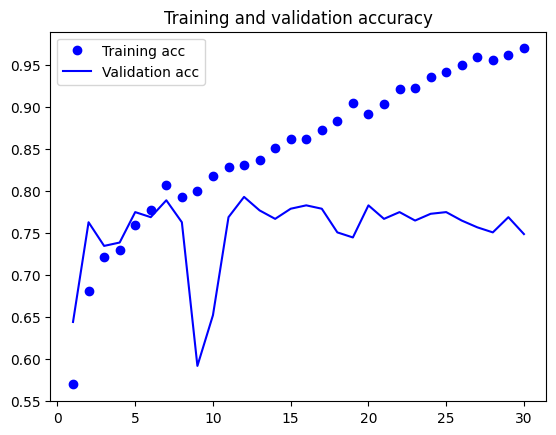

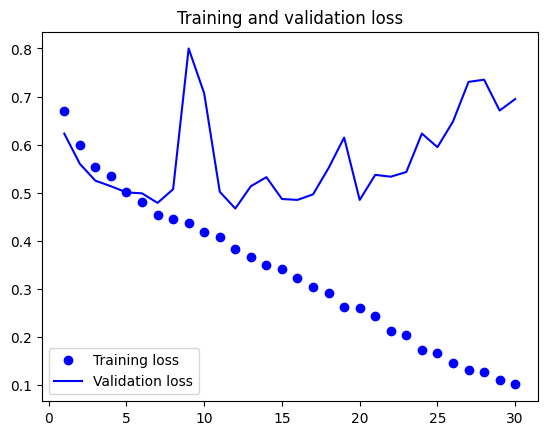

In [154]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1 )
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [160]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

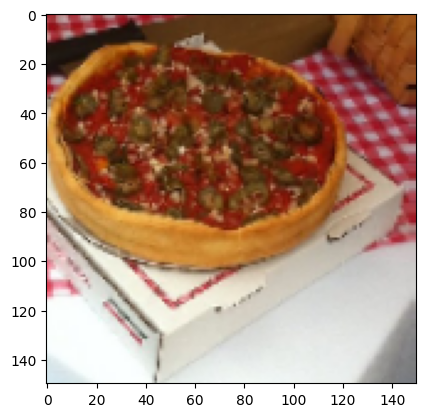

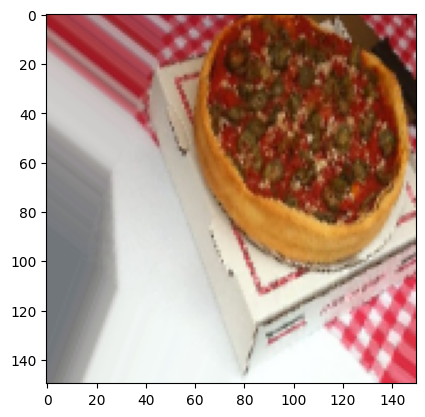

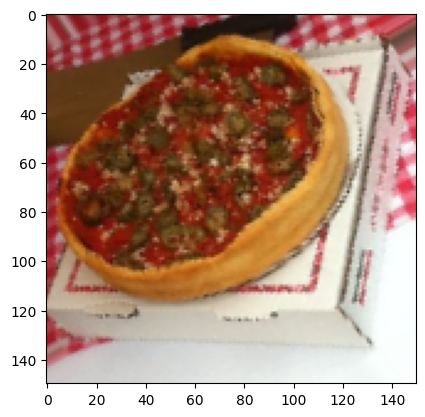

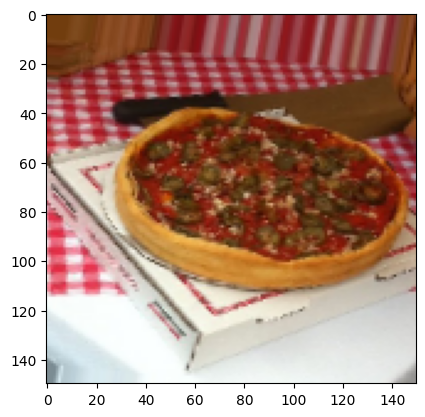

In [161]:
import os
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img

train_pizza_dir = '/content/drive/MyDrive/pizza_not_pizza/train/pizza'

# Gets a list of file names in the train pizza folder
fnames = [os.path.join( train_pizza_dir, fname) for fname in os.listdir( train_pizza_dir)]

# We pick one pizza image to play with
img_path = fnames[3]

# Read the image and resize it
img = load_img(img_path, target_size=(150, 150))

# Convert it to a numpy array with shape (150,150, 3)
x = img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generated batched of randlomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

In [162]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [163]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255) # Rescale all images by 1/255

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    '/content/drive/MyDrive/pizza_not_pizza/train',
    # All images will be resized to 150x150
    target_size=(150,150), #Resize all images to 150 X 150
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/pizza_not_pizza/validation',
     target_size=(150,150), #Resize all images to 150 X 150
     batch_size=20,
     class_mode='binary')

Found 1440 images belonging to 2 classes.
Found 497 images belonging to 2 classes.


In [170]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=72,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=25)


<ipython-input-170-b0f36fe61812>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
72/72 [==============================] - 18s 252ms/step - loss: 0.3990 - acc: 0.8257 - val_loss: 0.6498 - val_acc: 0.7103
Epoch 2/30
72/72 [==============================] - 19s 264ms/step - loss: 0.4178 - acc: 0.8118 - val_loss: 0.4190 - val_acc: 0.8229
Epoch 3/30
72/72 [==============================] - 18s 251ms/step - loss: 0.4043 - acc: 0.8194 - val_loss: 0.4633 - val_acc: 0.7928
Epoch 4/30
72/72 [==============================] - 21s 287ms/step - loss: 0.4034 - acc: 0.8271 - val_loss: 0.5142 - val_acc: 0.7404
Epoch 5/30
72/72 [==============================] - 21s 287ms/step - loss: 0.3954 - acc: 0.8299 - val_loss: 0.4648 - val_acc: 0.7767
Epoch 6/30
72/72 [==============================] - 18s 257ms/step - loss: 0.3874 - acc: 0.8326 - val_loss: 0.4308 - val_acc: 0.8068
Epoch 7/30
72/72 [==============================] - 19s 267ms/step - loss: 0.4058 - acc: 0.8181 - val_loss: 0.5809 - val_acc: 0.7243
Epoch 8/30
72/72 [==============================] - 21s 287ms/step - 

In [171]:
model.save('pizza_not_pizza.h5')

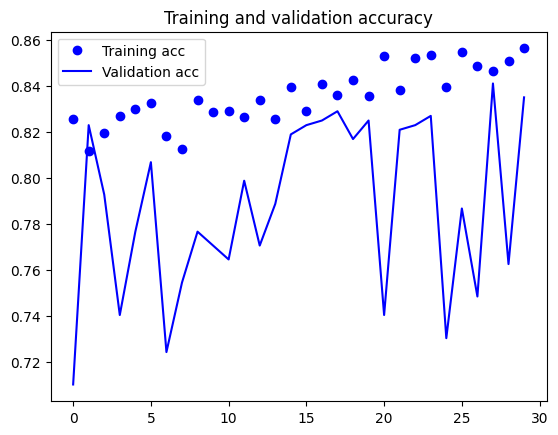

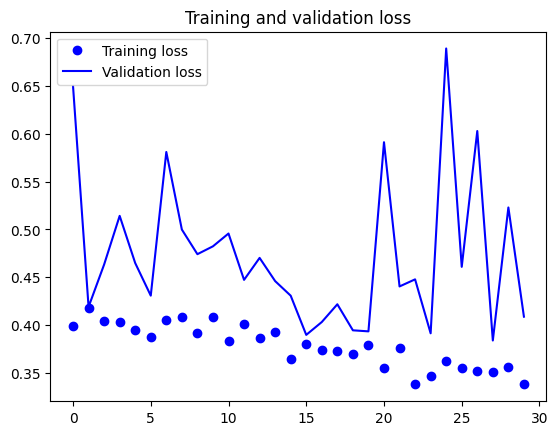

In [173]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
# Load the trained model
from tensorflow import keras
model = keras.models.load_model('pizza_not_pizza.h5')

In [183]:
# Load the new image
from tensorflow.keras.utils import load_img
img = load_img('/content/drive/MyDrive/pizza_not_pizza/test/pizza/2711828.jpg', target_size=(150,150,))

In [184]:
# Convert the image to a numpy array
from tensorflow.keras.utils import img_to_array
img_array = img_to_array(img)

In [185]:
# Expand the dimensions of the image array
import numpy as np
img_array = np.expand_dims(img_array, axis=0)

In [186]:
# Normalize the image array
img_array = img_array / 255.0

In [187]:
# Make the prediction
prediction = model.predict(img_array)


1/1 [==============================] - 0s 18ms/step


In [188]:
# Print the prediction
if prediction[0] < 0.5:
  print("The image is not a pizza.")
else:
    print("The image is a pizza.")

The image is a pizza.


In [189]:
predicted_probability = prediction[0]

print(f"The predicted probability is: {predicted_probability}")

The predicted probability is: [0.952262]
